 ## data는 각 국가별 통계치들에 대한 데이터셋입니다. 아래의 각 column별 설명을 참고하셔서 유의미한 분석결과를 도출해주세요
- country : Name of the country
- child_mort : Death of children under 5 years of age per 1000 live births
- exports : Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita
- income : Net income per person
- inflation : The measurement of the annual growth rate of the Total GDP
- ife_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [151]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [85]:
data = pd.read_csv('Country-data.csv')

In [86]:
#####################
##### code here #####
#####################

In [87]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Given data doesn't have an null data

data.isnull().sum()

In [90]:
#copy data for handlefree
#make a dataframe which has and data of bitrth and health
dfh=data[['health','life_expec','total_fer','child_mort']]

In [91]:
dfh.head()

,health,life_expec,total_fer,child_mort
0,7.58,56.2,5.82,90.2
1,6.55,76.3,1.65,16.6
2,4.17,76.5,2.89,27.3
3,2.85,60.1,6.16,119.0
4,6.03,76.8,2.13,10.3


In [115]:
pop =[1,1,2,3,4]
popd=pd.DataFrame(pop)
popd

,0
0,1
1,1
2,2
3,3
4,4


In [123]:
popd.duplicated().sum() # 겹치는거 1개 

1

In [107]:
#check same country data is available
data.country.describe()

count      167
unique     167
top       Iraq
freq         1
Name: country, dtype: object

In [124]:
# there is none of duplicated country in a data set 
data.country.duplicated().sum()

0

나라별 데이타중 겹치는것이 없으므로 나라특성 상관없이 주어진 데이터에서의 상관관계를 먼저 본다.

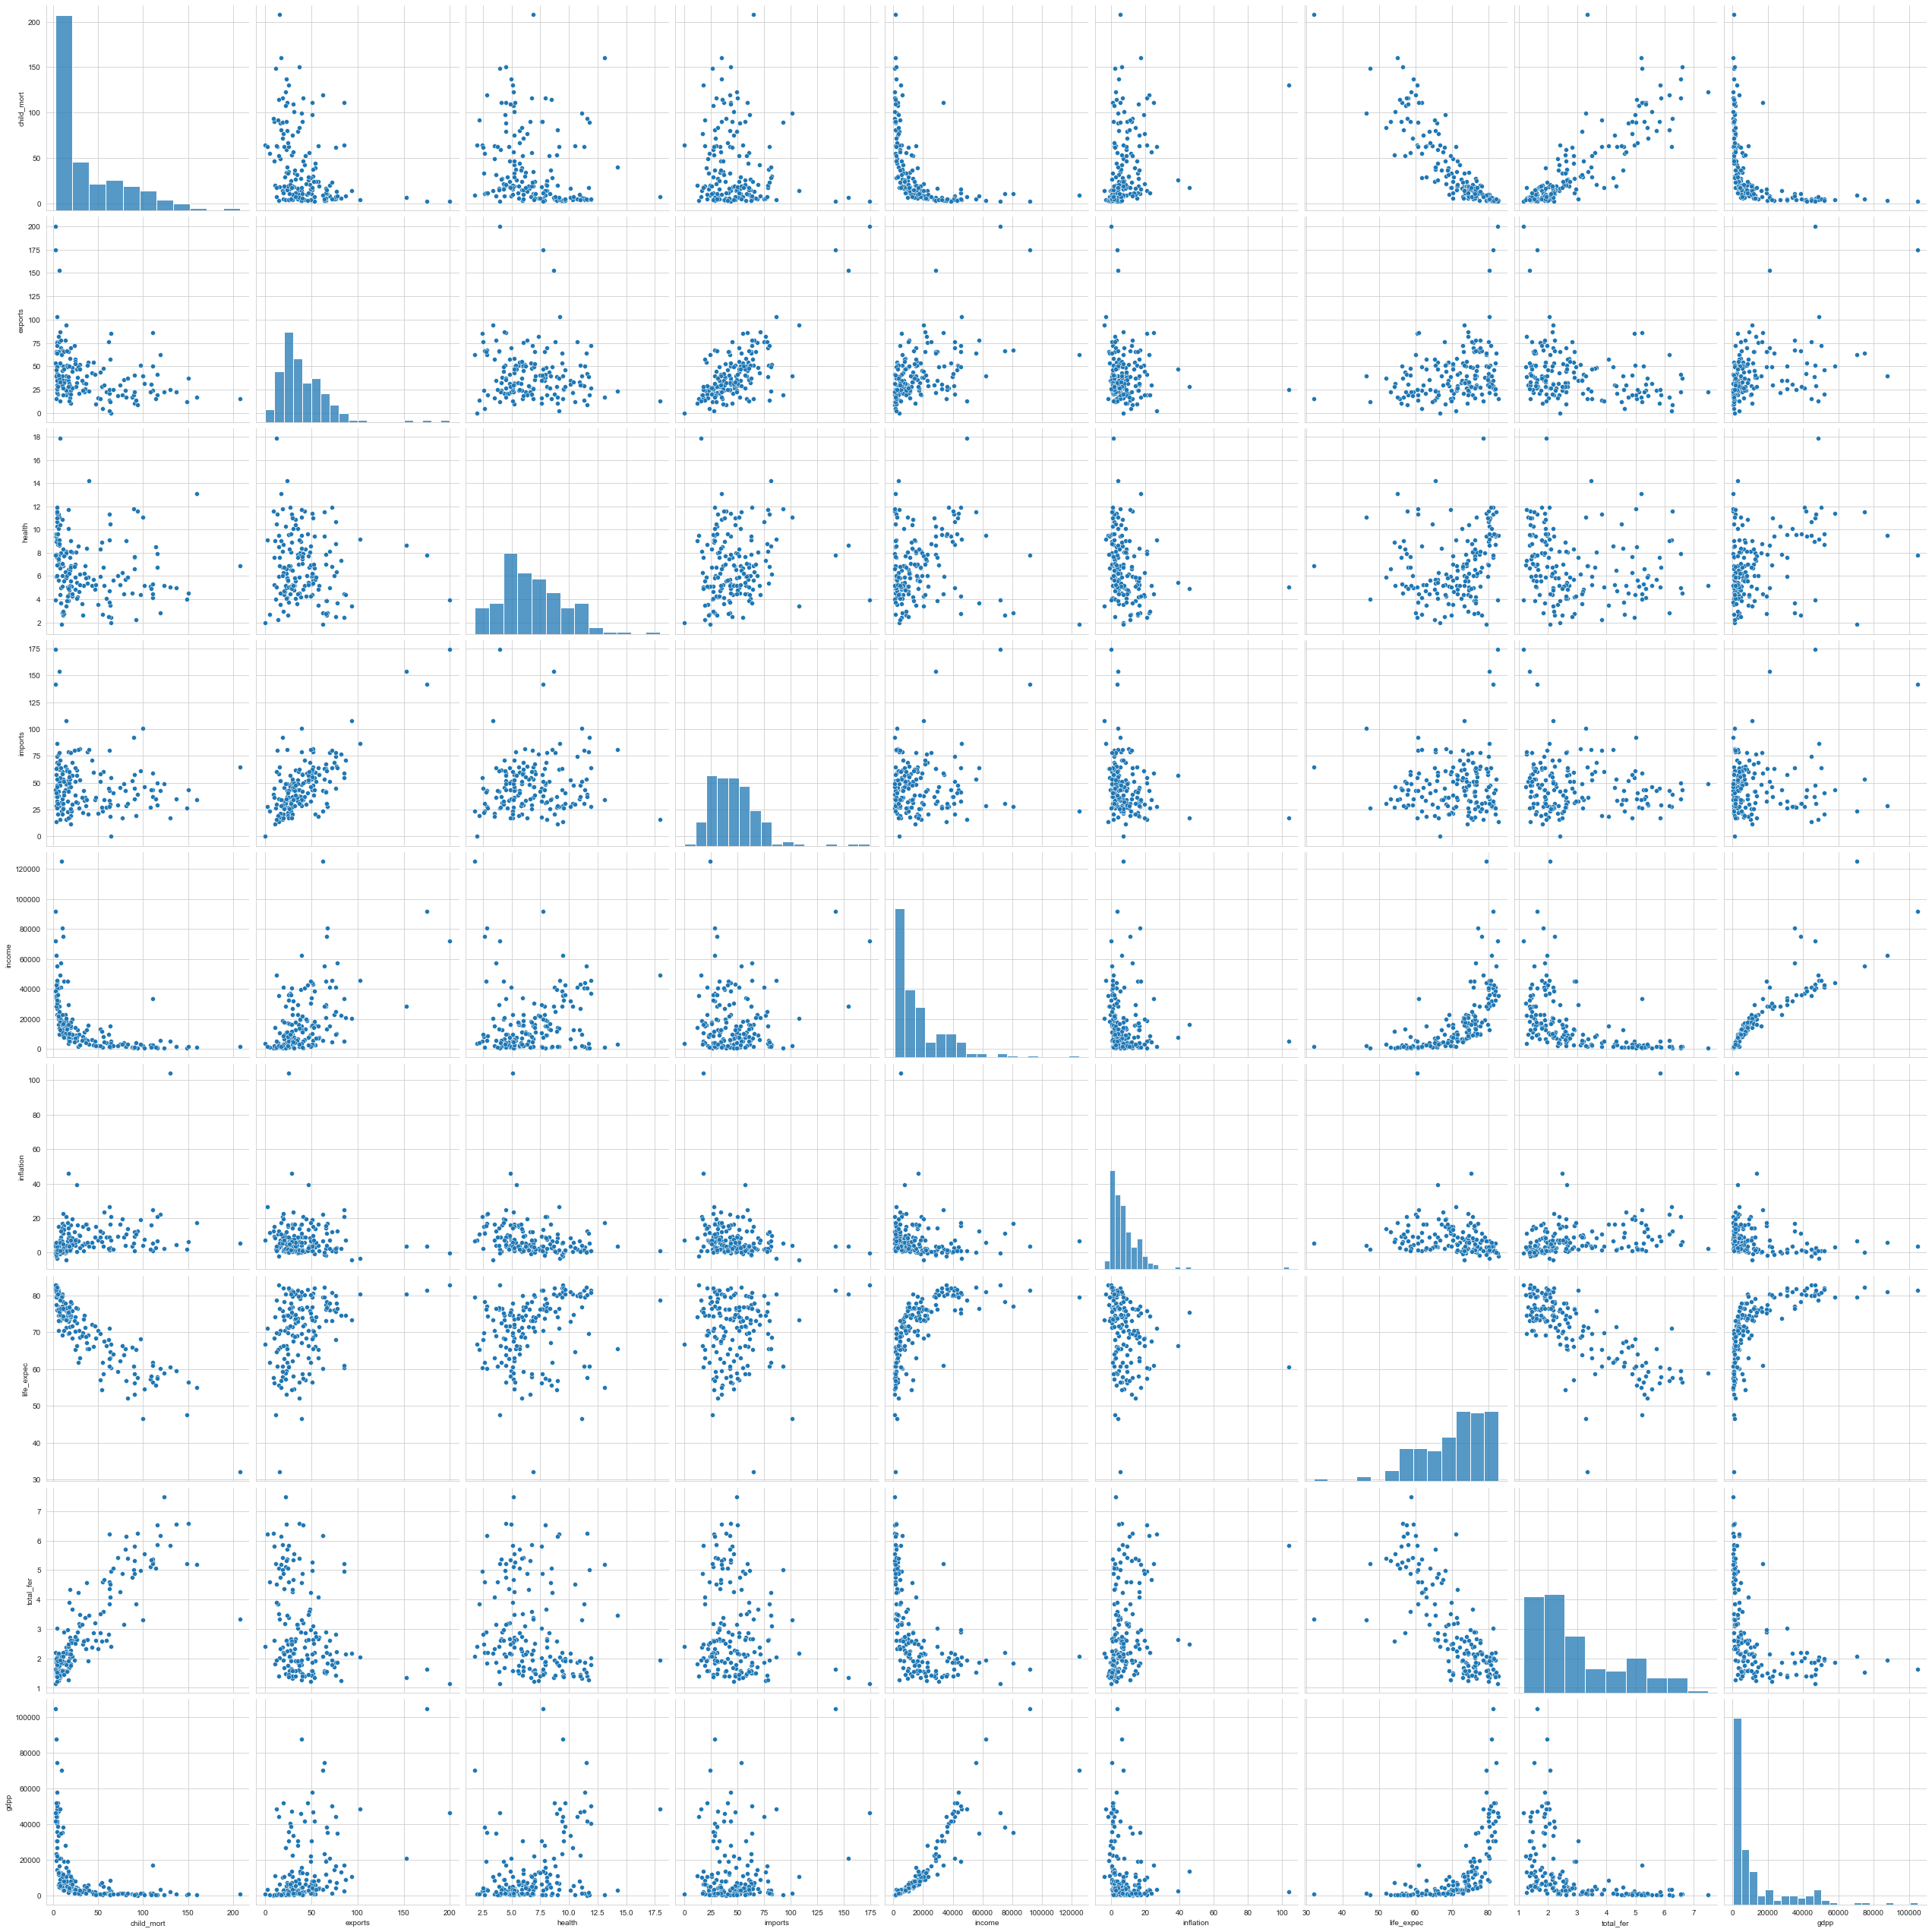

In [93]:
#seaborn pairplot > 모든 경우의 수 파악
sns.pairplot(data,height=4,palette='husl')
plt.show()

In [94]:
#check 1. realation between health data and life expec and etc
dfh

,health,life_expec,total_fer,child_mort
0,7.58,56.2,5.82,90.2
1,6.55,76.3,1.65,16.6
2,4.17,76.5,2.89,27.3
3,2.85,60.1,6.16,119.0
4,6.03,76.8,2.13,10.3
...,...,...,...,...
162,5.25,63.0,3.50,29.2
163,4.91,75.4,2.47,17.1
164,6.84,73.1,1.95,23.3
165,5.18,67.5,4.67,56.3


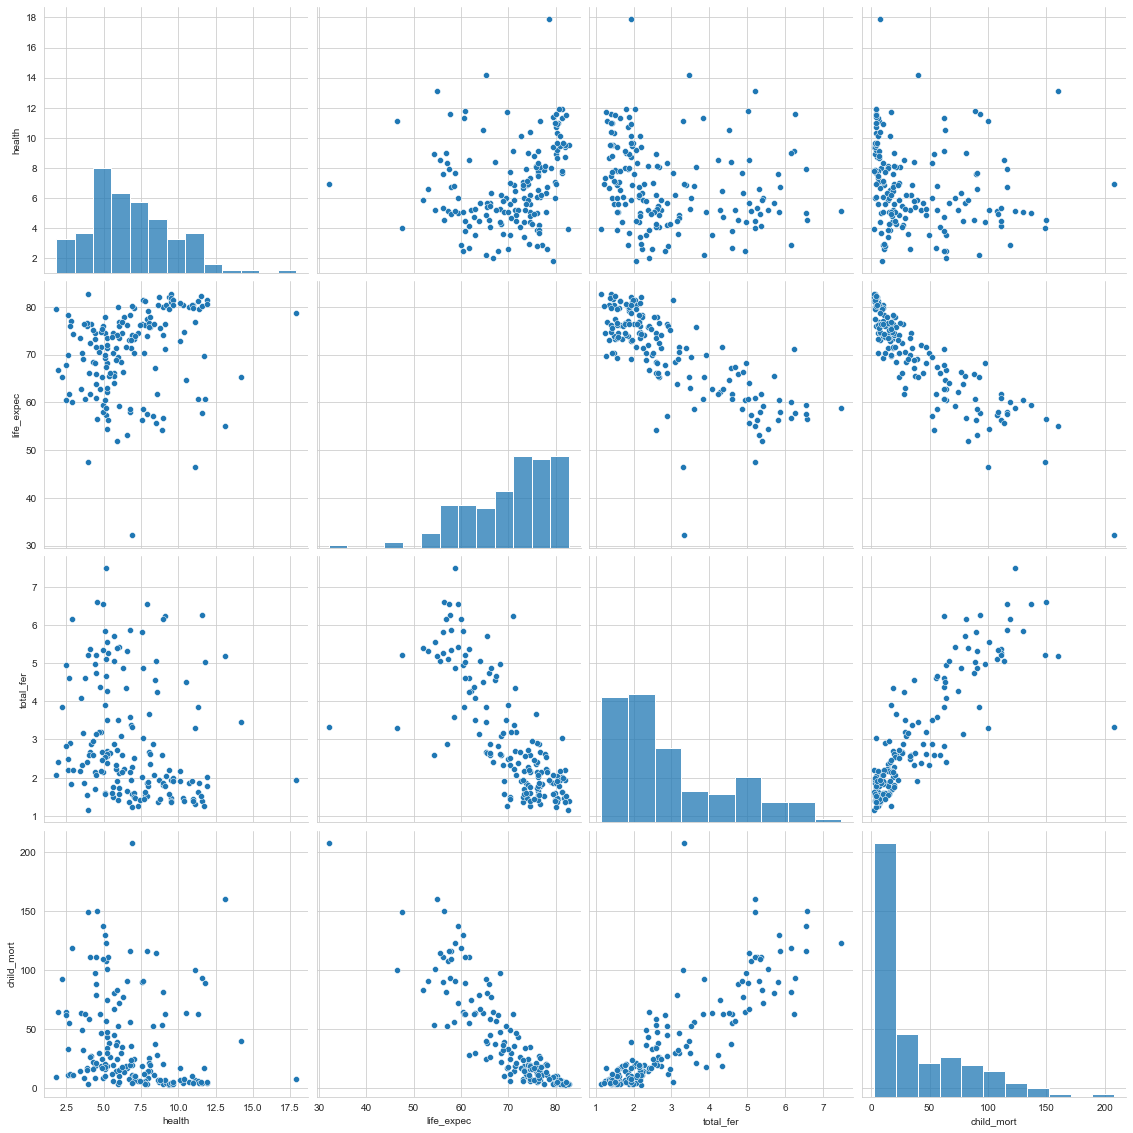

In [155]:
sns.pairplot(dfh,height=4)
#sns.pairplot(dfh,kind='reg',height=4)
plt.show()

point in a health data and life_expec data

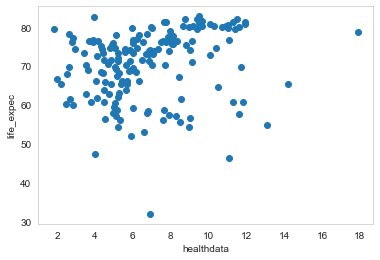

In [95]:
plt.scatter(dfh.health,dfh.life_expec)
plt.xlabel('healthdata')
plt.ylabel('life_expec')
plt.grid()
plt.show()

In [96]:
import scipy.stats as stats
corrh_life=stats.pearsonr(dfh.health,dfh.life_expec)
corrh_life

(0.21069212144020807, 0.006275263050804119)

귀무 가설(H0): 상관관계가 없다.
상관계수 0.21 / 유의 확률 0.006 <0.01

귀무 가설 기각: 상관있다.

In [97]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('health~life_expec',dfh).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
life_expec,1.0,55.599465,55.599465,7.664792,0.006275
Residual,165.0,1196.889831,7.253878,NaN,NaN


In [98]:
#R-squared 가 상당히 작은걸 보여준다.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     7.665
Date:                Thu, 19 Aug 2021   Prob (F-statistic):            0.00628
Time:                        18:07:17   Log-Likelihood:                -401.41
No. Observations:                 167   AIC:                             806.8
Df Residuals:                     165   BIC:                             813.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2242      1.672      1.331      0.185      -1.076       5.524
life_expec     0.0651      0.024      2.769      0.006       0.019       0.111
==============================================================================
Omnibus:                       16.921   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.444
Skew:                           0.715   Prob(JB):                     6.00e-05
Kurtosis:                       3.866   Cond. No.                         570.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

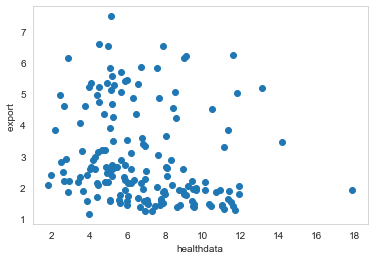

In [99]:
plt.scatter(dfh.health,dfh.total_fer)
plt.xlabel('healthdata')
plt.ylabel('export ')
plt.grid()
plt.show()

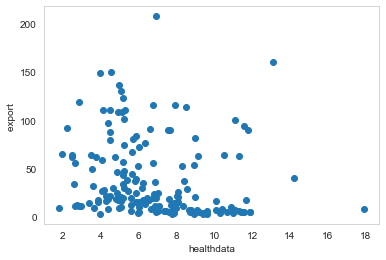

In [100]:
plt.scatter(dfh.health,dfh.child_mort)
plt.xlabel('healthdata')
plt.ylabel('export ')
plt.grid()
plt.show()

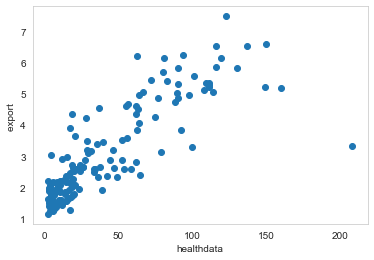

In [101]:
plt.scatter(dfh.child_mort,dfh.total_fer)
plt.xlabel('healthdata')
plt.ylabel('export ')
plt.grid()
plt.show()

In [102]:
corrh_life=stats.pearsonr(dfh.child_mort,dfh.total_fer)
corrh_life

(0.8484781105566704, 1.8377768900585433e-47)

child_mort data 와  total fer data 간의 강한 상관관계를 확인.

In [157]:
model = ols('child_mort~ total_fer',dfh).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
total_fer,1.0,194367.121895,194367.121895,424.107097,1.837777e-47
Residual,165.0,75619.048404,458.297263,NaN,NaN


In [159]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             child_mort   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     424.1
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.84e-47
Time:                        18:27:57   Log-Likelihood:                -747.60
No. Observations:                 167   AIC:                             1499.
Df Residuals:                     165   BIC:                             1505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.3642      3.635     -7.803      0.000     -35.541     -21.187
total_fer     22.6035      1.098     20.594      0.000      20.436      24.771
==============================================================================
Omnibus:                      139.451   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2763.197
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      22.110   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
x=dfh.child_mort
y=dfh.total_fer
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m=m.round(4)
c=c.round(4)
print(m,c)
#m = 기울기 c y절편

0.0318 1.7291


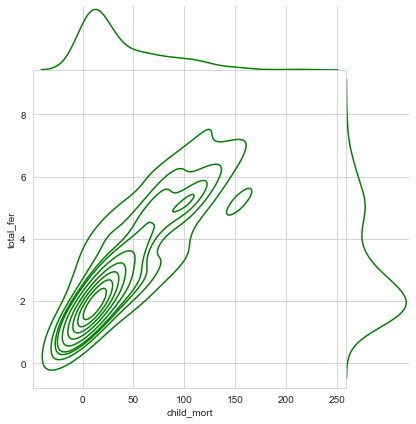

In [152]:
sns.jointplot(dfh.child_mort,dfh.total_fer,dfh,kind='kde',space=0,color='g')
plt.show()

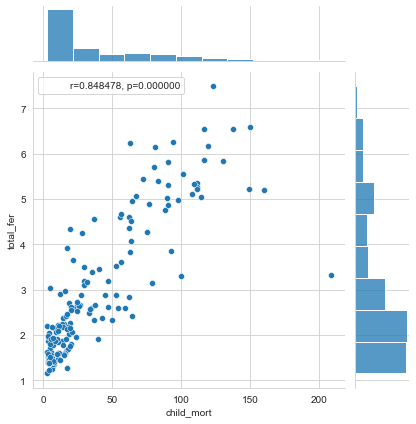

In [153]:
sns.set_style('whitegrid')
graph=sns.jointplot(x=dfh.child_mort,y=dfh.total_fer, data=dfh)
#write a code of inpujt pearson result. in an plot
r,p = stats.pearsonr(dfh.child_mort,dfh.total_fer)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()